In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns 
import matplotlib.pyplot as plt
import re
import sidetable
pd.options.display.max_columns=None

In [2]:
data= pd.read_csv('data_seleccionada.csv')
data.head(1)

,Unnamed: 0,q_1_age,q_2_gender,q_5_role,q_7_coding_languages_used,q_8_coding_languages_recommended,q_15_years_using_ml,q_20_industry,q_21_company_size,q_22_ds_team_size,q_23_current_use_of_ml,q_24_main_activities_work,q_25_yearly_compensation,q_26_ml_invested_money,q31_b_part_1,q31_b_part_2,q31_b_part_3,q31_b_part_4,q31_b_part_5,q31_b_part_6,q31_b_part_7,q31_b_part_8,q31_b_part_9,q31_b_other,q37_b_part_1,q37_b_part_2,q37_b_part_3,q37_b_part_4,q37_b_part_5,q37_b_part_6,q37_b_part_7,q37_b_other,q40_part_1,q40_part_2,q40_part_3,q40_part_4,q40_part_5,q40_part_6,q40_part_7,q40_part_8,q40_part_9,q40_part_10,q40_part_11,q40_other,q_41_primary_da_tool
0,0,50-54,Man,Other,"Python, R",Python,5-10 years,Manufacturing/Fabrication,50-249 employees,3-4,No (we do not use ML methods),None of these activities are an important par...,"25,000-29,999",$100-$999,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Coursera,edX,Kaggle Learn Courses,DataCamp,NaN,Udacity,Udemy,NaN,NaN,NaN,NaN,NaN,"Local development environments (RStudio, Jupyt..."


### `q23 current use ml y q21 tamaño de la empresa` 
¿Se utilizan métodos de ML en las grandes empresas? 

In [3]:
df_q23_q21 = data.copy()

In [4]:
df_q23_q21['q_23_current_use_of_ml'].unique()

array(['No (we do not use ML methods)',
       'We are exploring ML methods (and may one day put a model into production)',
       'I do not know',
       'We use ML methods for generating insights (but do not put working models into production)',
       nan,
       'We have well established ML methods (i.e., models in production for more than 2 years)',
       'We recently started using ML methods (i.e., models in production for less than 2 years)'],
      dtype=object)

In [5]:
df_q23_q21['q_21_company_size'].unique()

array(['50-249 employees', '1000-9,999 employees', nan,
       '10,000 or more employees', '0-49 employees', '250-999 employees'],
      dtype=object)

In [6]:
column = ['q_21_company_size']

for i in column: 
    df_q23_q21[i] = df_q23_q21[i].str.replace(",", "")

In [7]:
df_q23_q21['q_21_company_size'].unique()

array(['50-249 employees', '1000-9999 employees', nan,
       '10000 or more employees', '0-49 employees', '250-999 employees'],
      dtype=object)

In [8]:
df_q23_q21['q_21_company_size'].value_counts().reset_index()

,index,q_21_company_size
0,0-49 employees,5055
1,10000 or more employees,3416
2,1000-9999 employees,3059
3,50-249 employees,2567
4,250-999 employees,2154


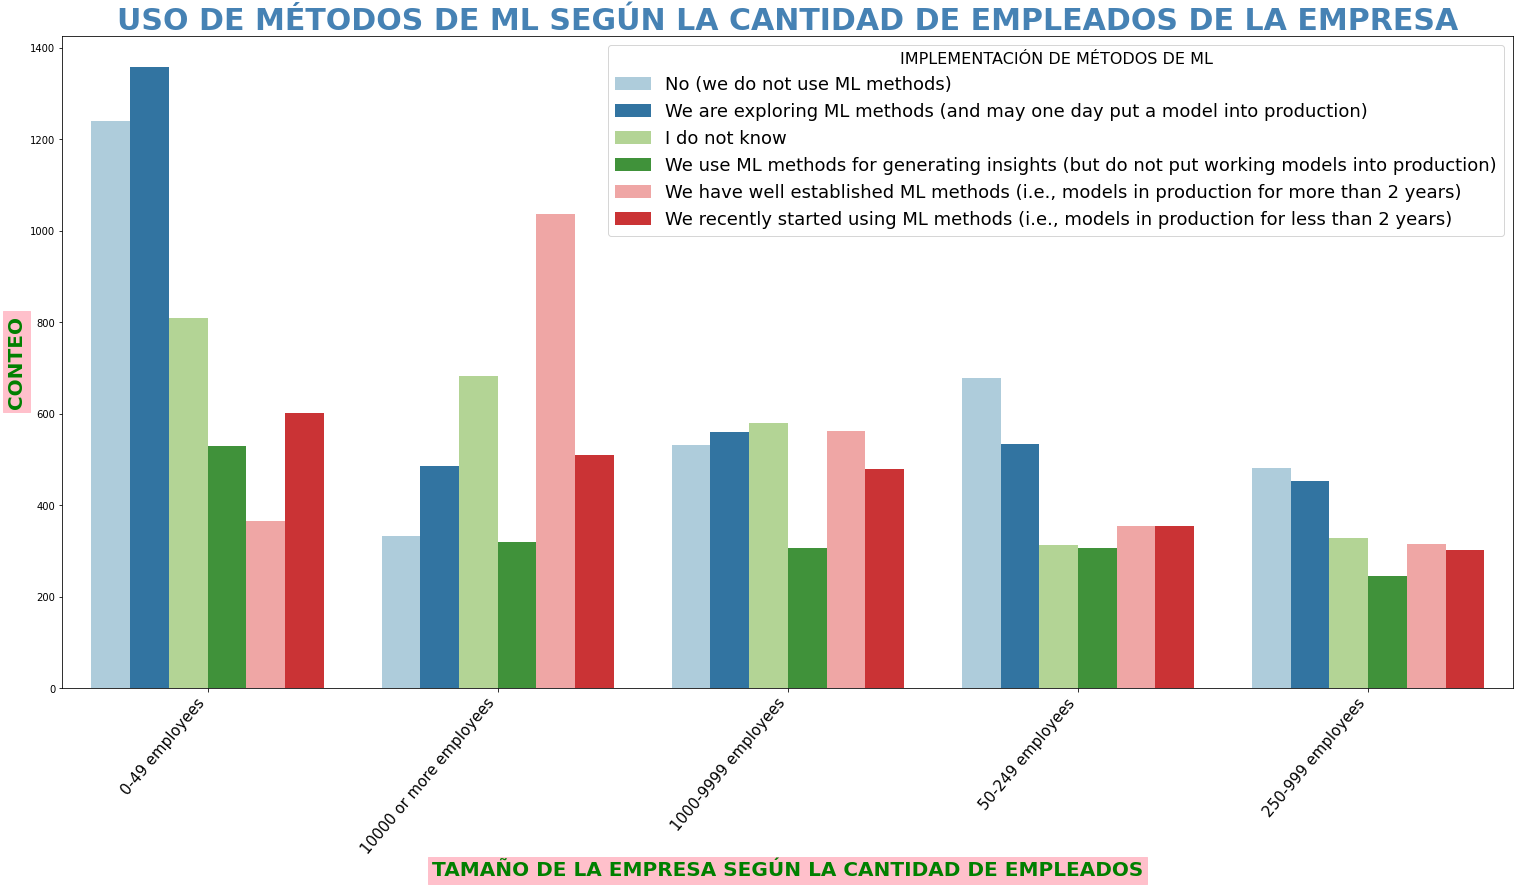

In [55]:
plt.figure(figsize=(26,12))
fig = sns.countplot(data = df_q23_q21, x = 'q_21_company_size', hue = 'q_23_current_use_of_ml', palette='Paired', order = df_q23_q21['q_21_company_size'].value_counts().index)
plt.title("USO DE MÉTODOS DE ML SEGÚN LA CANTIDAD DE EMPLEADOS DE LA EMPRESA", fontsize = 30, color = 'Steelblue', fontweight = 'bold')
plt.xlabel('TAMAÑO DE LA EMPRESA SEGÚN LA CANTIDAD DE EMPLEADOS', fontsize = 20, color = 'g', fontweight = 'bold', fontstretch = 0, backgroundcolor = 'pink')
plt.ylabel('CONTEO', fontsize = 20, color = 'g', fontweight = 'bold', fontstretch = 0, backgroundcolor = 'pink')
plt.xticks(rotation=50, fontsize = 15, horizontalalignment ='right')
legend = plt.legend(prop={'size':18}, loc='upper right')
legend.set_title ("IMPLEMENTACIÓN DE MÉTODOS DE ML", prop = {'size': 16})

plt.show();

### `q21 tamaño empresa y q26 inversión en ml` 

¿Cuál es la relación entre la inversión en ML y dependiendo del tamaño de la empresa?

In [11]:
df_q21_q26 = data.copy()

In [12]:
df_q21_q26['q_21_company_size'].unique()

array(['50-249 employees', '1000-9,999 employees', nan,
       '10,000 or more employees', '0-49 employees', '250-999 employees'],
      dtype=object)

In [13]:
column = ['q_21_company_size']

for i in column: 
    df_q21_q26[i] = df_q21_q26[i].str.replace(",", "")

In [14]:
df_q21_q26['q_21_company_size'].unique()

array(['50-249 employees', '1000-9999 employees', nan,
       '10000 or more employees', '0-49 employees', '250-999 employees'],
      dtype=object)

In [15]:
df_q21_q26['q_26_ml_invested_money'].unique()

array(['$100-$999', '$0 ($USD)', '$1000-$9,999', nan, '$1-$99',
       '$100,000 or more ($USD)', '$10,000-$99,999'], dtype=object)

In [16]:
df_q21_q26["q_26_ml_invested_money"]=df_q21_q26["q_26_ml_invested_money"].fillna('Undefined')

In [17]:
patron1= 'Undefined'

patron2= '\$0\s\(\$USD\)'

patron3= '\$100\-\$999'

patron4= '\$1\-\$99'

patron5= '\$10\,000\-\$99\,999'

patron6= '\$100\,000\sor\smore\s\(\$USD\)'

In [18]:
def rango(val):

    if re.findall(patron1,val):
        return val.replace(val,'Undefined')
    elif re.findall(patron2,val):
        return val.replace(val,'0$')  
    elif re.findall(patron3,val):
        return val.replace(val,"1-99$")
    elif re.findall(patron4,val):
        return val.replace(val,"100-999$")
    elif re.findall(patron5,val):
        return val.replace(val,"1000-9999$")
    elif re.findall(patron6,val):
        return val.replace(val,"100000$ or more")

In [19]:
df_q21_q26['q_26_ml_invested_money'] = df_q21_q26['q_26_ml_invested_money'].apply(rango)

In [20]:
df_q21_q26['q_26_ml_invested_money'].unique()

array(['1-99$', '0$', None, 'Undefined', '100-999$', '100000$ or more',
       '1000-9999$'], dtype=object)

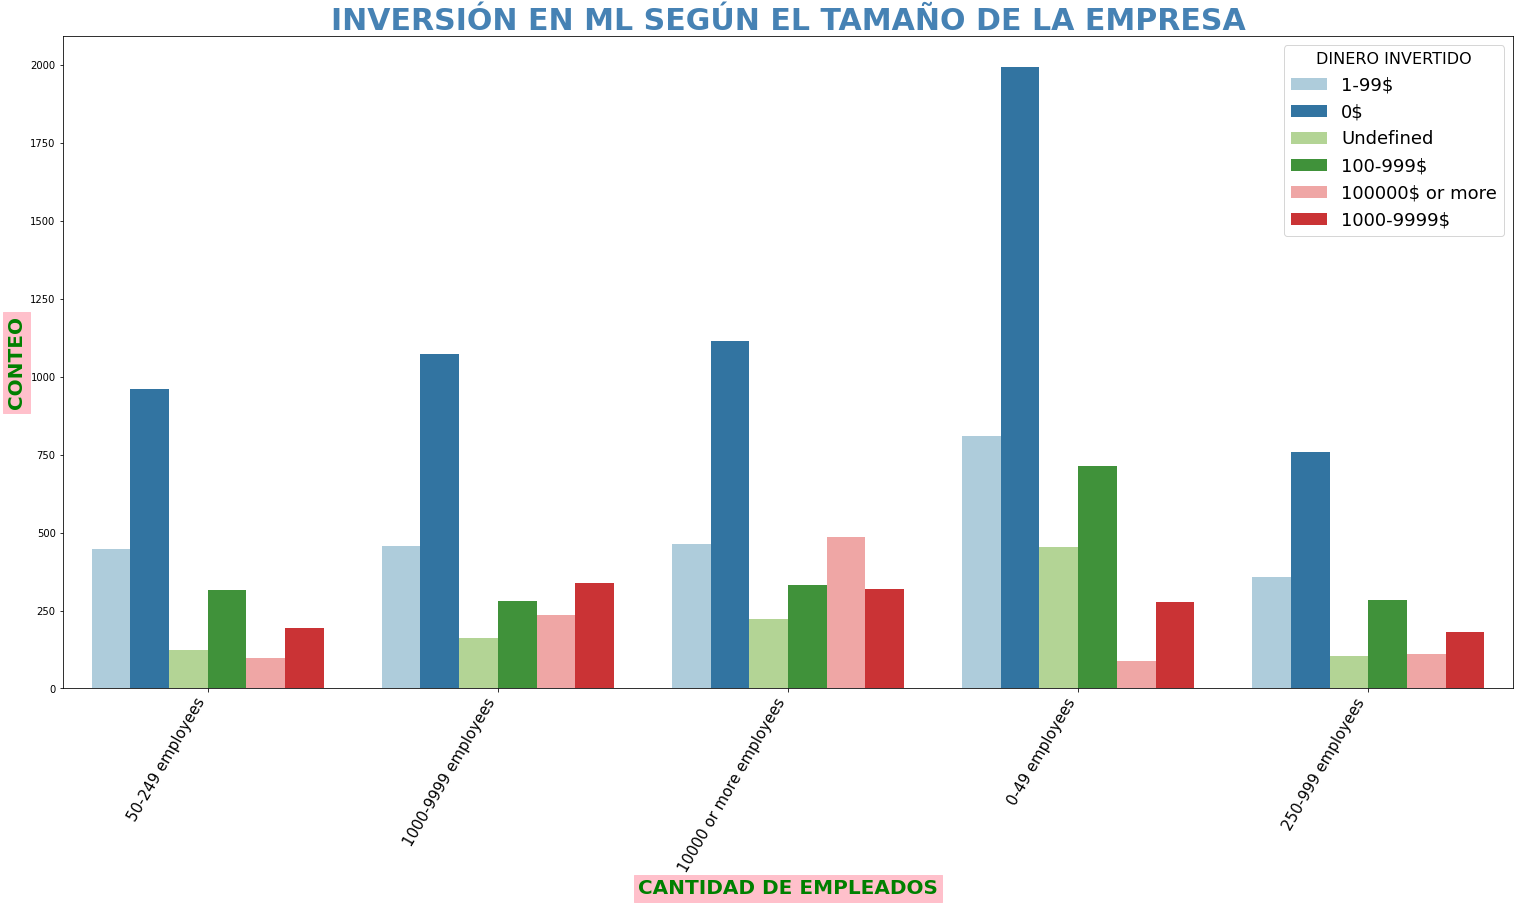

In [56]:
plt.figure(figsize=(26,12))
fig = sns.countplot(data = df_q21_q26, x = 'q_21_company_size', hue = 'q_26_ml_invested_money', palette='Paired')
plt.title("INVERSIÓN EN ML SEGÚN EL TAMAÑO DE LA EMPRESA", fontsize = 30, color = 'Steelblue', fontweight = 'bold')
plt.xlabel('CANTIDAD DE EMPLEADOS', fontsize = 20, color = 'g', fontweight = 'bold', fontstretch = 0, backgroundcolor = 'pink')
plt.ylabel('CONTEO', fontsize = 20, color = 'g', fontweight = 'bold', fontstretch = 0, backgroundcolor = 'pink')
legend = plt.legend(prop={'size':18}, loc ='upper right')
legend.set_title ("DINERO INVERTIDO", prop = {'size': 16})
plt.xticks(rotation=60, fontsize = 15, horizontalalignment ='right')

plt.show(); 

### `q15 Años de experiencia` 
¿Realmente se necesita experiencia para poder ejercer con ML?



In [32]:
df_q15 = data.copy()

In [33]:
df_q15['q_5_role'].unique()

array(['Other', 'Program/Project Manager', 'Software Engineer',
       'Research Scientist', 'Currently not employed', 'Student',
       'Data Scientist', 'Data Analyst', 'Machine Learning Engineer',
       'Business Analyst', 'Data Engineer', 'Product Manager',
       'Statistician', 'Developer Relations/Advocacy',
       'DBA/Database Engineer'], dtype=object)

In [35]:
df_q15[~df_q15['q_5_role'].isin(['Currently not employed','Student'])]

,Unnamed: 0,q_1_age,q_2_gender,q_5_role,q_7_coding_languages_used,q_8_coding_languages_recommended,q_15_years_using_ml,q_20_industry,q_21_company_size,q_22_ds_team_size,q_23_current_use_of_ml,q_24_main_activities_work,q_25_yearly_compensation,q_26_ml_invested_money,q31_b_part_1,q31_b_part_2,q31_b_part_3,q31_b_part_4,q31_b_part_5,q31_b_part_6,q31_b_part_7,q31_b_part_8,q31_b_part_9,q31_b_other,q37_b_part_1,q37_b_part_2,q37_b_part_3,q37_b_part_4,q37_b_part_5,q37_b_part_6,q37_b_part_7,q37_b_other,q40_part_1,q40_part_2,q40_part_3,q40_part_4,q40_part_5,q40_part_6,q40_part_7,q40_part_8,q40_part_9,q40_part_10,q40_part_11,q40_other,q_41_primary_da_tool
0,0,50-54,Man,Other,"Python, R",Python,5-10 years,Manufacturing/Fabrication,50-249 employees,3-4,No (we do not use ML methods),None of these activities are an important par...,"25,000-29,999",$100-$999,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Coursera,edX,Kaggle Learn Courses,DataCamp,NaN,Udacity,Udemy,NaN,NaN,NaN,NaN,NaN,"Local development environments (RStudio, Jupyt..."
1,1,50-54,Man,Program/Project Manager,"SQL, C, C++, Java",Python,< 1 year,Manufacturing/Fabrication,"1000-9,999 employees",1-2,We are exploring ML methods (and may one day p...,Build and/or run the data infrastructure that...,"60,000-69,999",$0 ($USD),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,Google Cloud AutoML,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Kaggle Learn Courses,NaN,NaN,NaN,NaN,NaN,"Cloud-certification programs (direct from AWS,...",University Courses (resulting in a university ...,NaN,NaN,"Advanced statistical software (SPSS, SAS, etc.)"
2,2,22-24,Man,Software Engineer,"Python, C++, Java",Python,I do not use machine learning methods,Academics/Education,"1000-9,999 employees",0,I do not know,None of these activities are an important par...,$0-999,$0 ($USD),NaN,Azure Machine Learning Studio,Google Cloud Vertex AI,DataRobot,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DataRobot AutoML,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DataCamp,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Basic statistical software (Microsoft Excel, G..."
3,3,45-49,Man,Research Scientist,Python,Python,5-10 years,Academics/Education,"1000-9,999 employees",0,I do not know,Do research that advances the state of the ar...,"30,000-39,999",$0 ($USD),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Coursera,edX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Local development environments (RStudio, Jupyt..."
4,4,45-49,Man,Other,"Python, C, MATLAB",Python,10-20 years,Academics/Education,50-249 employees,5-9,We use ML methods for generating insights (but...,Analyze and understand data to influence produ...,"30,000-39,999","$1000-$9,999",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Kaggle Learn Courses,NaN,NaN,NaN,Udemy,NaN,NaN,NaN,NaN,NaN,"Local development environments (RStudio, Jupyt..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25967,25967,35-39,Man,Software Engineer,"Python, SQL, Bash",Python,3-4 years,Computers/Technology,"10,000 or more employees",20+,We use ML methods for generating insights (but...,Build and/or run the data infrastructure that...,"80,000-89,999","$100,000 or more ($USD)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Kaggle Learn Courses,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Cloud-based data software & APIs (AWS, GCP, Az..."
25968,25968,30-34,Man,Data Analyst,"Python, SQL, Javascript, Bash",Python,1-2 years,Computers/Technology,"10,000 or more employees",20+,We are exploring ML methods (and may one day p...,Analyze and understand data to influence produ...,"15,000-19,999","$1000-$9,999",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Coursera,NaN,Kaggle Learn Courses,DataCamp,NaN,Udacity,Udemy,LinkedIn Learning,"Cloud-certification programs (direct from AWS,...",NaN,NaN,NaN,"Business i

In [36]:
df_q15 = df_q15[~df_q15['q_5_role'].isin(['Currently not employed','Student'])]

In [37]:
df_q15['q_5_role'].unique()

array(['Other', 'Program/Project Manager', 'Software Engineer',
       'Research Scientist', 'Data Scientist', 'Data Analyst',
       'Machine Learning Engineer', 'Business Analyst', 'Data Engineer',
       'Product Manager', 'Statistician', 'Developer Relations/Advocacy',
       'DBA/Database Engineer'], dtype=object)

In [38]:
df_q15['q_15_years_using_ml'].unique()

array(['5-10 years', '< 1 year', 'I do not use machine learning methods',
       '10-20 years', '2-3 years', '1-2 years', '4-5 years', '3-4 years',
       nan, '20 or more years'], dtype=object)

In [40]:
df_q15['q_15_years_using_ml'] = df_q15['q_15_years_using_ml'].fillna('Undefined')

C:\Users\arian\AppData\Local\Temp\ipykernel_23280\1915486502.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_q15['q_15_years_using_ml'] = df_q15['q_15_years_using_ml'].fillna('Undefined')


In [41]:
df_q15['q_15_years_using_ml'].unique()

array(['5-10 years', '< 1 year', 'I do not use machine learning methods',
       '10-20 years', '2-3 years', '1-2 years', '4-5 years', '3-4 years',
       'Undefined', '20 or more years'], dtype=object)

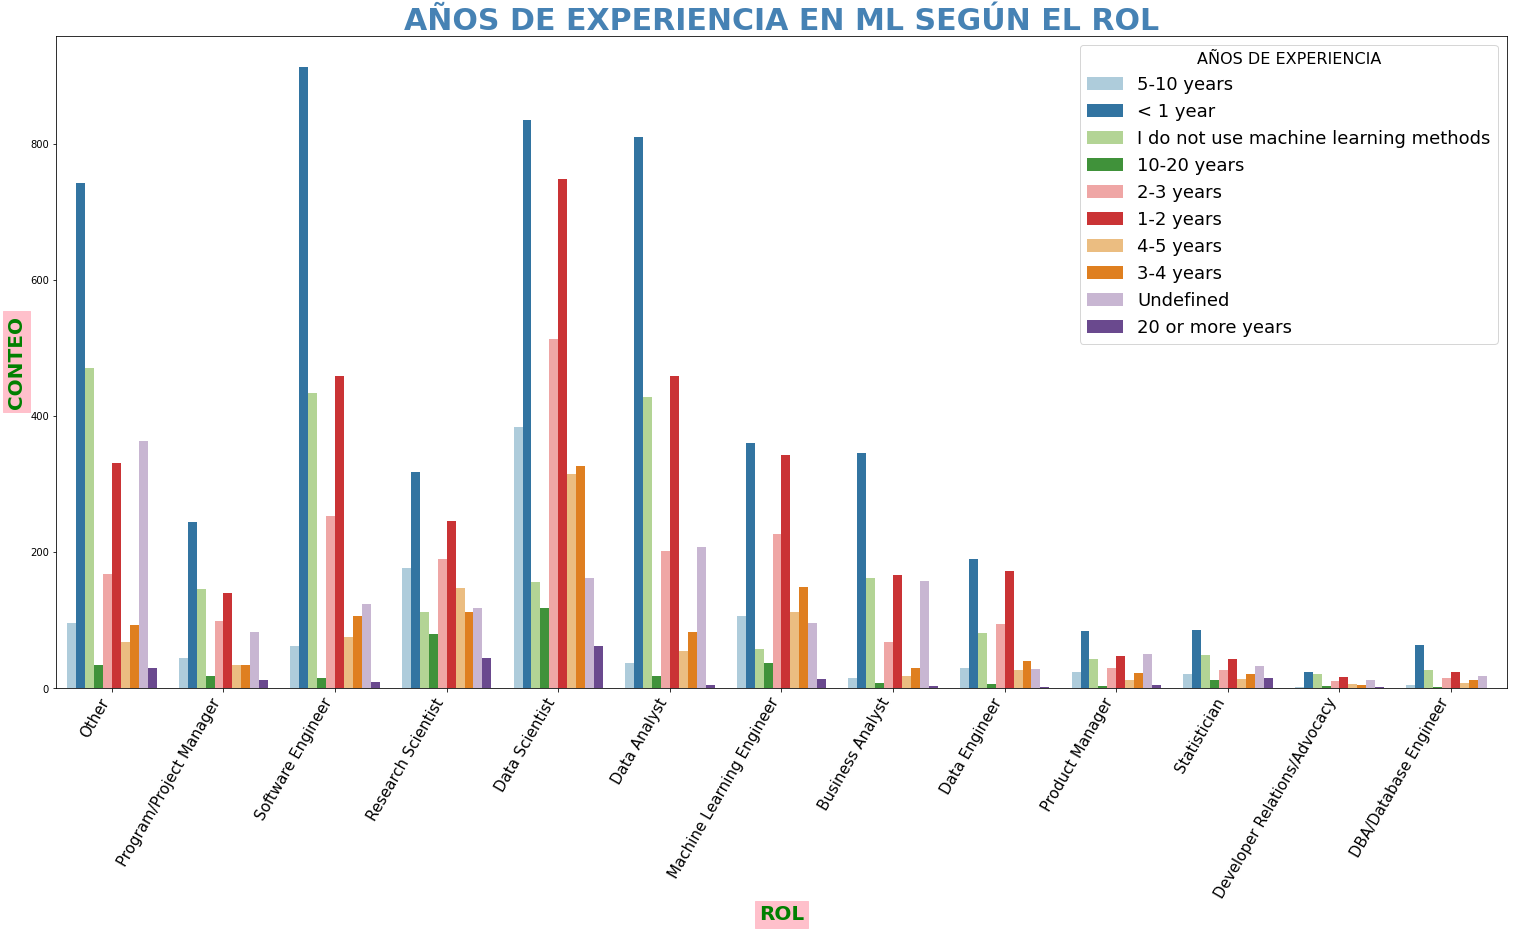

In [58]:
plt.figure(figsize=(26,12))
fig = sns.countplot(data = df_q15, x = 'q_5_role', hue = 'q_15_years_using_ml', palette='Paired')
plt.title("AÑOS DE EXPERIENCIA EN ML SEGÚN EL ROL", fontsize = 30, color = 'Steelblue', fontweight = 'bold')
plt.xlabel('ROL', fontsize = 20, color = 'g', fontweight = 'bold', fontstretch = 0, backgroundcolor = 'pink')
plt.ylabel('CONTEO', fontsize = 20, color = 'g', fontweight = 'bold', fontstretch = 0, backgroundcolor = 'pink')
legend = plt.legend(prop={'size':18}, loc='upper right')
legend.set_title ("AÑOS DE EXPERIENCIA", prop = {'size': 16})
plt.xticks(rotation=60, fontsize = 15, horizontalalignment ='right')

plt.show(); 
